In [2]:
from funcs import *
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [3]:
flights = sns.load_dataset('flights')
flights.info()
flights.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


,year,month,passengers
46,1952,Nov,172
129,1959,Oct,407
26,1951,Mar,178
102,1957,Jul,465
20,1950,Sep,158


In [4]:
CF = flights.copy()
CF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [5]:
CF['Date'] = pd.to_datetime(CF.year.astype(str)+'/'+CF.month.astype(str))

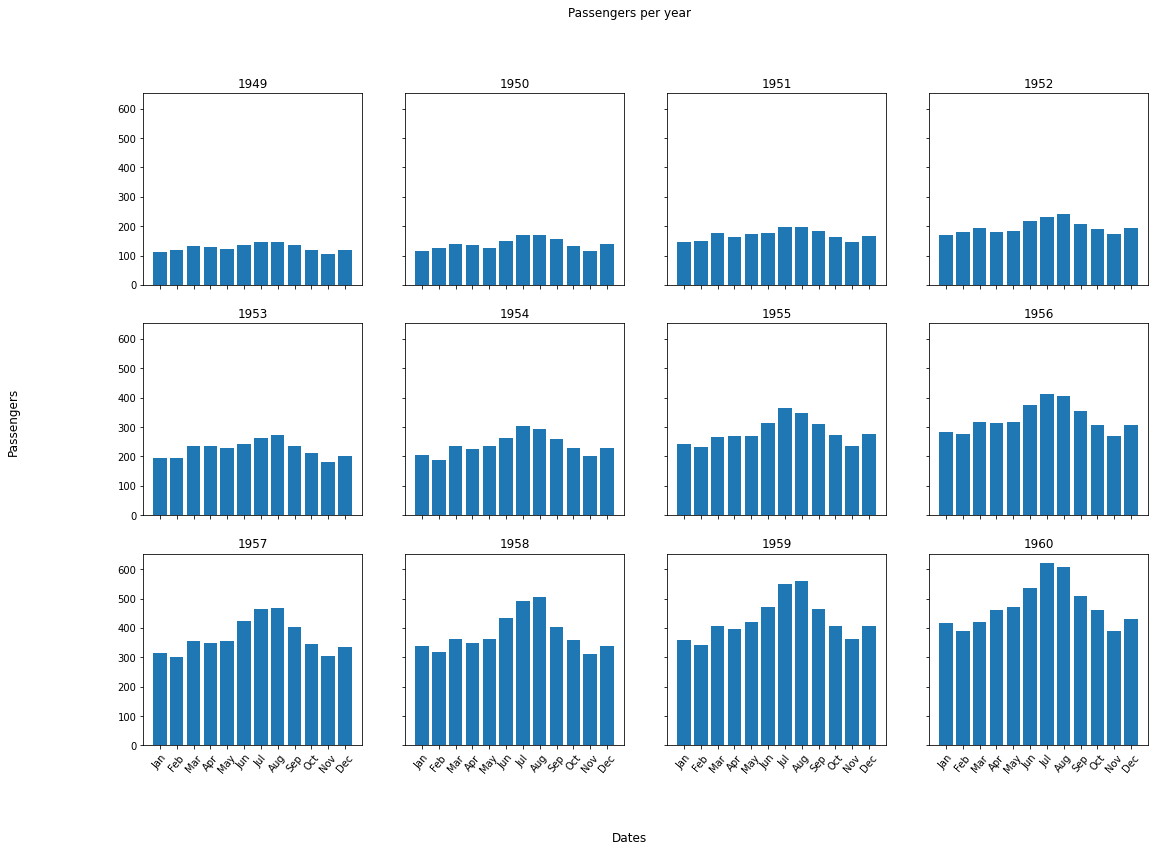

In [13]:
fig, ax = plt.subplots(3,4, sharex=True, sharey = True)
ax = ax.flatten()
fig.set_size_inches(18,12)
fig.supxlabel('Dates')
fig.supylabel('Passengers')
fig.suptitle('Passengers per year')
for ind, year in enumerate(np.unique(np.array(CF.Date.dt.year))):
    ax[ind].bar('month', 'passengers', data = CF.loc[CF.Date.dt.year == year]);
    ax[ind].tick_params(axis = 'x', rotation=50)
    ax[ind].set(title = year)

In [25]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
heatmap = pd.DataFrame()
for ind, month in enumerate(months):
    heatmap[month] = CF.loc[CF.Date.dt.month == ind+1].reset_index()['passengers']
heatmap.set_index(np.unique(np.array(CF.Date.dt.year)))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


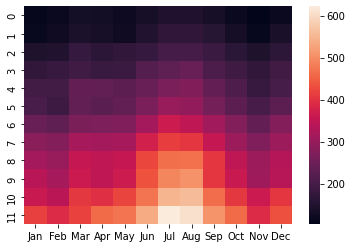

In [27]:
sns.heatmap(heatmap);